# K-means clustering

Its an **unsupervised learning** which is divided into 2:
- Clustering
- Association

## Clustering
- K-mean
- Hierarchial.K-mean
- DBSCAN

### K-Means
'K' stands for number of average of the clusters, clusters are groups...take unorganized data and form clusters/groups, this looks like similar to classification, but difference is:
- classification is supervised while K-means is unsupervised
- They use different metrics
- classification has categories while K-means has clusters/groups

#### Working of K-Means clustering
- Select the K-value(Centroids)
- Initialize the centroids randomly

**WCSS** = Summation(xi - yi)^2
Sum of squares of the distances of each data point in all clusters to their respective centroids

The more the clusters the lower the WCSS value

### Hierarchial Clustering
- Agglomerative: Bottom to Top
- Divisive: Top to Bottom

## Project on Customer segmentation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
from sklearn.cluster import KMeans

Dataset got from:
    
https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [2]:
df = pd.read_csv('Mall_customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


This project is to achieve:
have a strategy to maximize number of customers, therefore get to know which customer have a positive impact, more on customer experience, segment the customers to know which ones to target, eg:_if we have more female then we add more female products_

In [4]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Conculde that we dont have null-values, the columns: _CustomerID, Age, Annula Income, Spending Score_ are in their correct data type.

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Conclusion:
- Average age of the customers is _~38_
- Customers age range between _18 to 70_
- Customers have an average annual income of _~60K USD_

<AxesSubplot:xlabel='Age', ylabel='count'>

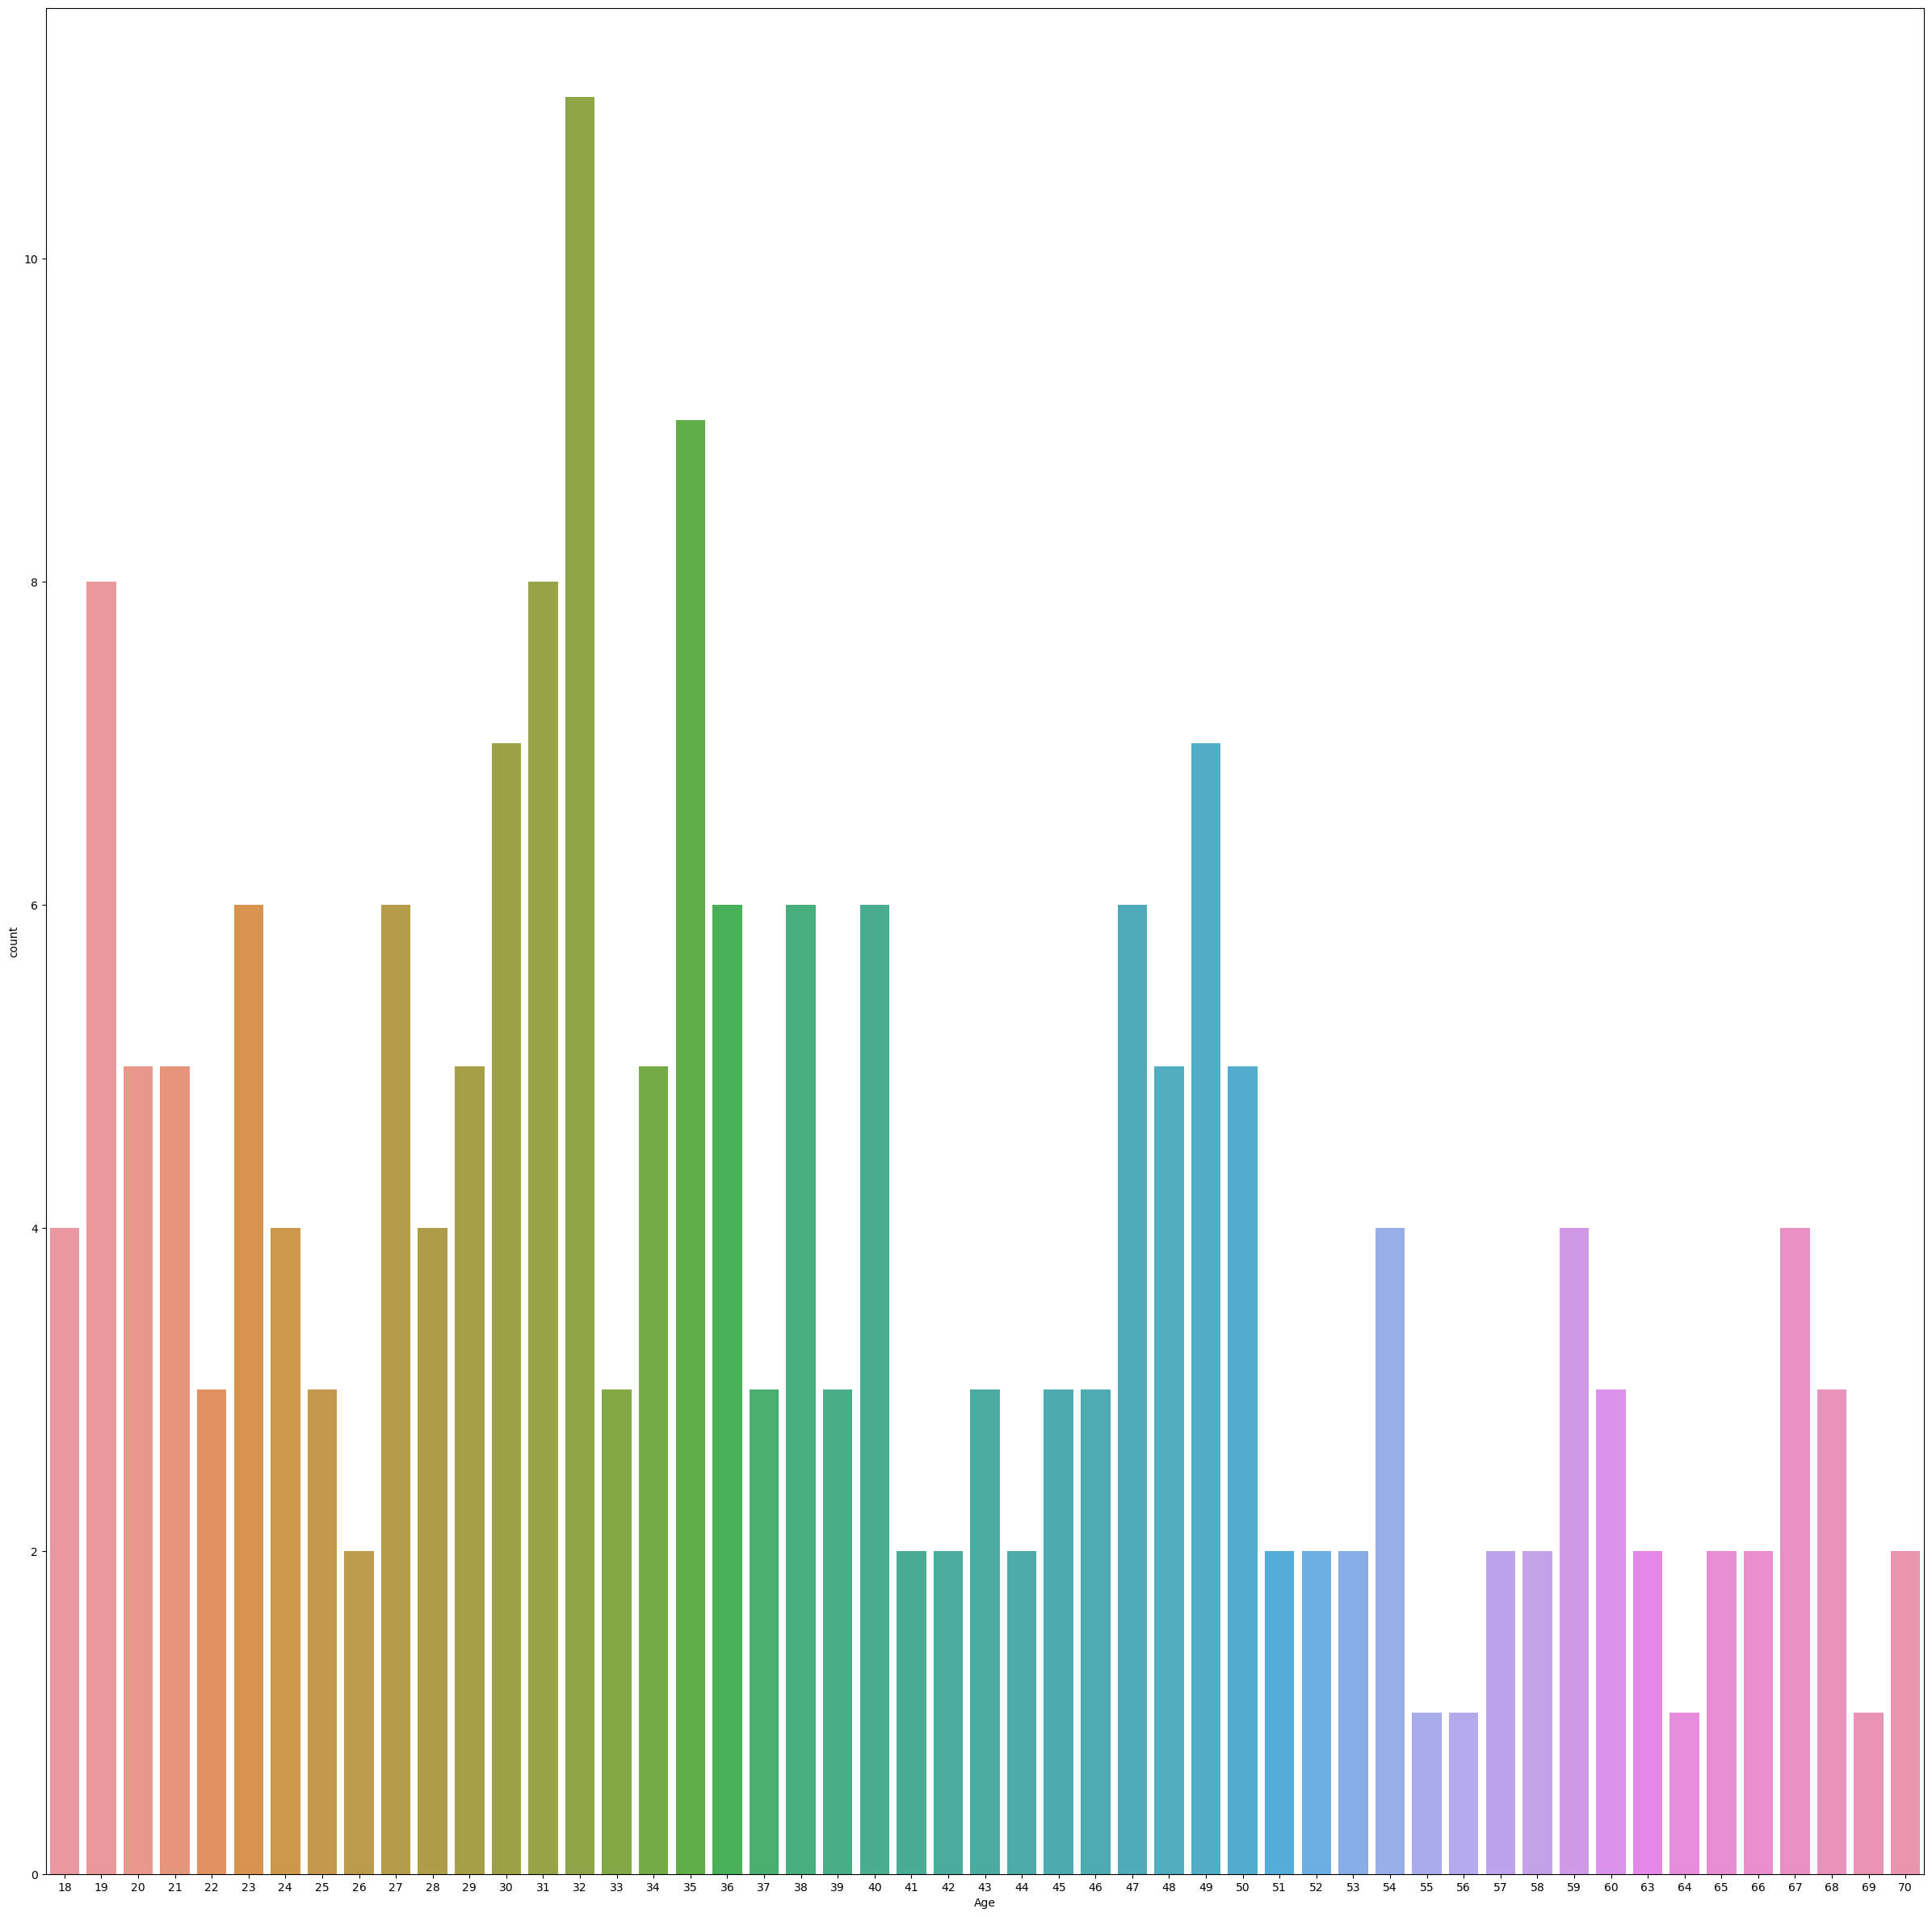

In [9]:
# Plot of Age distirbution
plt.figure(figsize=(30, 30))
sns.countplot(data=df, x='Age')

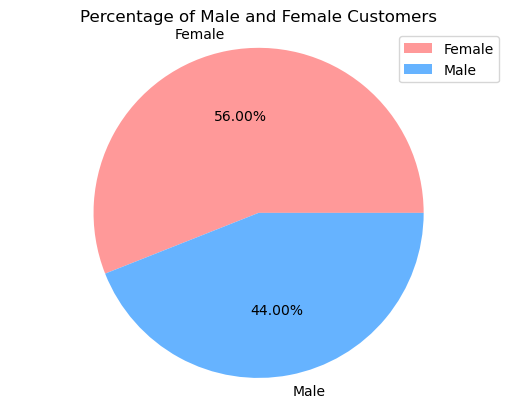

In [15]:
# Percentage of Male & Female visiting the Mall
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%1.2f%%', colors=['#ff9999','#66b3ff'],)
plt.title('Percentage of Male and Female Customers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()
plt.show()

In [10]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

**Conclusion**:
The female gender visit the Mall more than the Male, by margin of _12%_

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='count'>

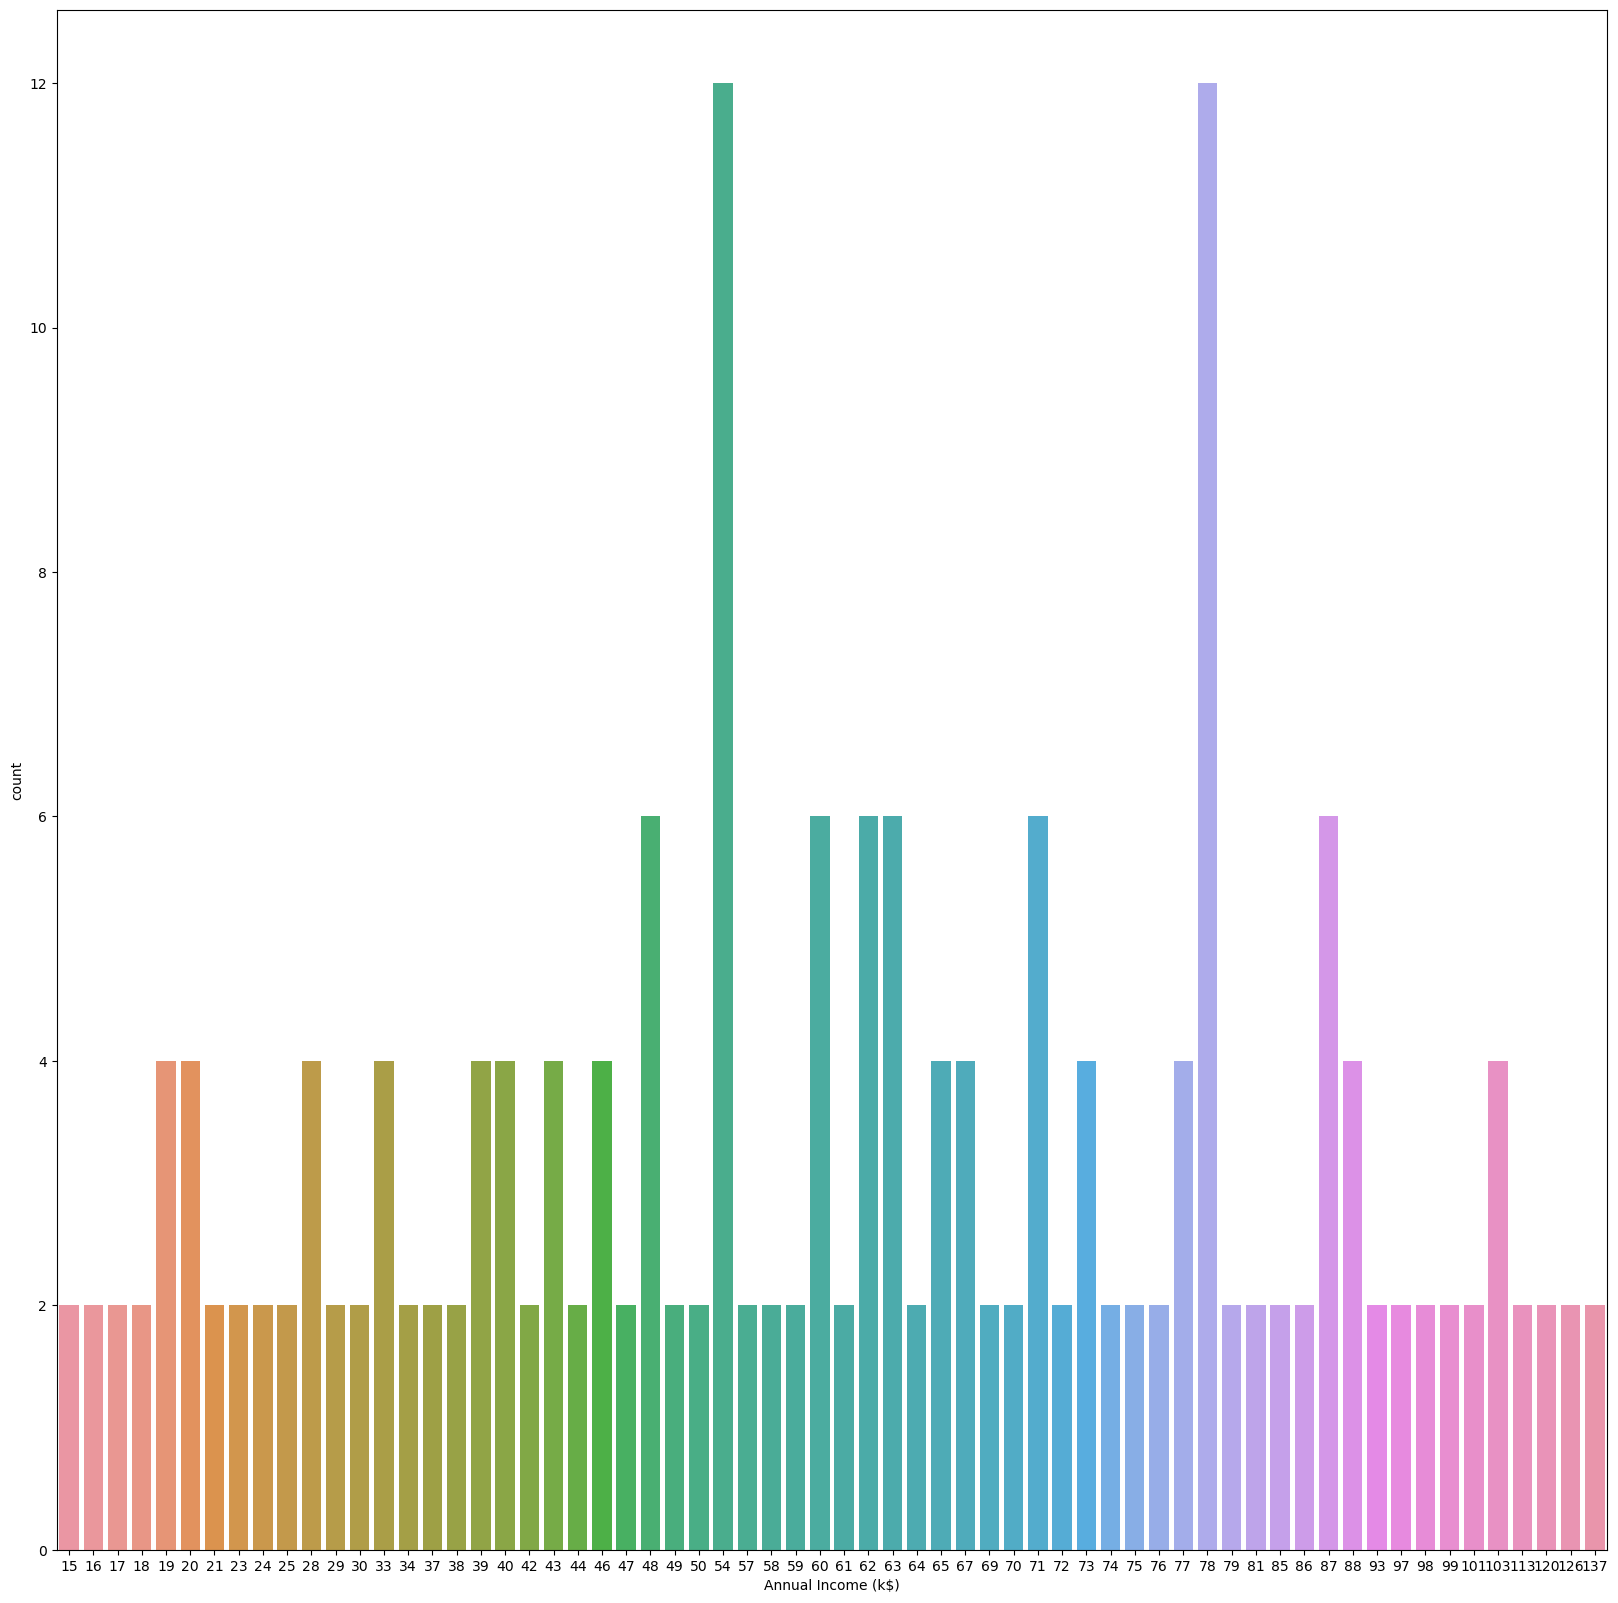

In [17]:
# Distribution of Annual Income
plt.figure(figsize=(20, 20))
sns.countplot( data=df, x=df['Annual Income (k$)'])

Customers with *\$54K and $78K* visit the Mall the most 

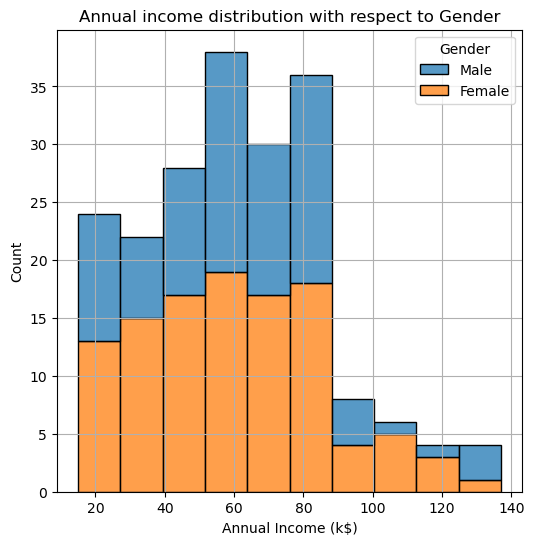

In [21]:
# the annual income distribution with respect to Gender
plt.figure(figsize=(6, 6))
sns.histplot(df, x='Annual Income (k$)', hue='Gender', multiple='stack')
plt.title("Annual income distribution with respect to Gender")
plt.grid()

**Conclusion:**
- The Male have higher annual income than Female, despite the number of Female visiting the Mall being more

In [22]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


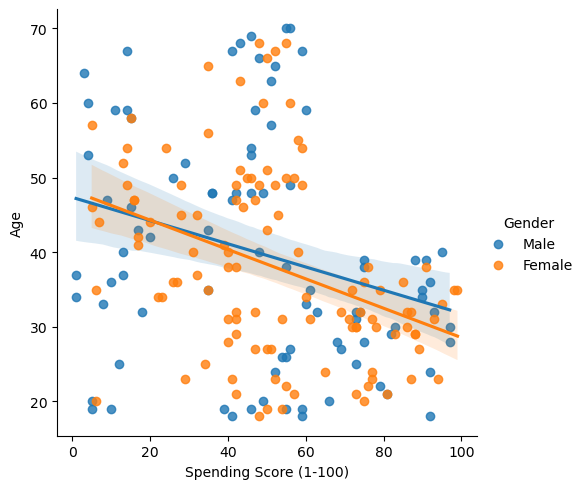

In [23]:
# lmplot with line of best-fit
sns.lmplot(data=df, x='Spending Score (1-100)', y='Age', hue='Gender')

The blurred blue and orange i.e the shadow colors are the margins of the lines above

This lmplot can be used also in a linear regression

**Conclusion**: the relationship is not linear...its scattered
- Those aged below 19 spend little but those of Age above 40 spend more


In [24]:
# Label enconding
from sklearn.preprocessing import LabelEncoder

In [25]:
enc = LabelEncoder()

In [26]:
df.Gender = enc.fit_transform(df.Gender)

In [27]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [28]:
df.drop('CustomerID', axis=1, inplace=True)  # this column wont affect

In [29]:
ssd = []
for i in range(1, 11):
    # Elbow method
    Kmodel = KMeans(n_clusters=i, n_init=15, max_iter=500)
    Kmodel.fit(df)
    ssd.append(Kmodel.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [30]:
ssd

[308862.06,
 212889.442455243,
 143391.59236035674,
 104414.67534220166,
 75412.59682443162,
 58348.64136331505,
 51165.184237107926,
 44355.31351771352,
 40857.186675020894,
 37480.46966312049]

Text(0.5, 1.0, 'Elbow Plot')

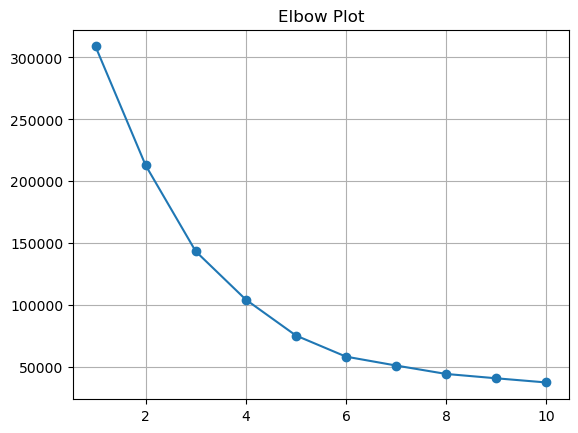

In [33]:
plt.plot(range(1, 11), ssd, marker='o')
plt.grid()
plt.title('Elbow Plot')

**Therefore we take the value of k=6, i.e 6 categories**

In [42]:
Kmodel = KMeans(n_clusters=6, n_init=15, max_iter=500)


In [43]:
Kmodel.fit(df)
# Kmodel.fit_predict(df)  # combo of fit & predict
# Kmodel.predict(df)

KMeans(max_iter=500, n_clusters=6, n_init=15)

In [44]:
prediction = Kmodel.predict(df)

In [45]:
prediction

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 0, 5, 0, 1,
       4, 5, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 3, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [46]:
Kmodel.cluster_centers_  # all the centroids

array([[ 0.44444444, 56.15555556, 53.37777778, 49.08888889],
       [ 0.34210526, 27.        , 56.65789474, 49.13157895],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.57142857, 41.68571429, 88.22857143, 17.28571429],
       [ 0.38095238, 44.14285714, 25.14285714, 19.52380952],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636]])

In [47]:
len(prediction)

200

In [48]:
len(Kmodel.cluster_centers_)

6

In [49]:
df['Cluster'] = prediction

In [50]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,4
1,1,21,15,81,5
2,0,20,16,6,4
3,0,23,16,77,5
4,0,31,17,40,4


In [51]:
sns.color_palette(None, len(np.unique(prediction)))

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354)]

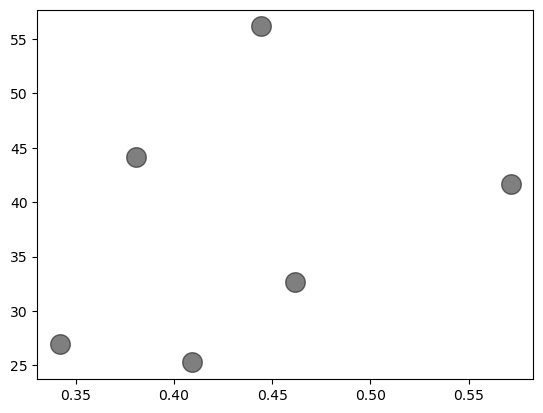

In [52]:
plt.scatter(Kmodel.cluster_centers_[:, 0], Kmodel.cluster_centers_[:, 1],
           c='black', s=200, alpha=0.5)

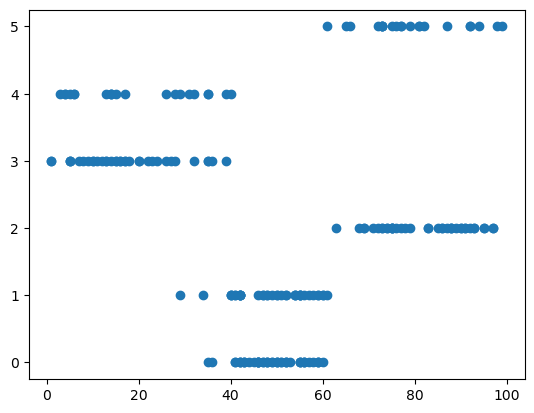

In [53]:
plt.scatter(df['Spending Score (1-100)'], df['Cluster'],
           marker='o')

In [54]:
# hierrachial clustering
from scipy.cluster.hierarchy import linkage, dendrogram

In [55]:
var = linkage(df, method='ward')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [12.5, 12.5, 50.0, 50.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [82.5, 82.5, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [125.0, 125.0, 150.0, 150.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [137.5, 137.5, 183.75, 183.75],
  [96.25, 96.25, 160.625, 160.625],
  [31.25, 31.25, 128.4375, 128.4375],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [245.0, 245.0, 255.0, 255.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [250.0, 250.0, 272.5, 272.5],
  [222.5, 222.5, 261.25, 261.25],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [325.0, 325.0, 335.0, 335.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360

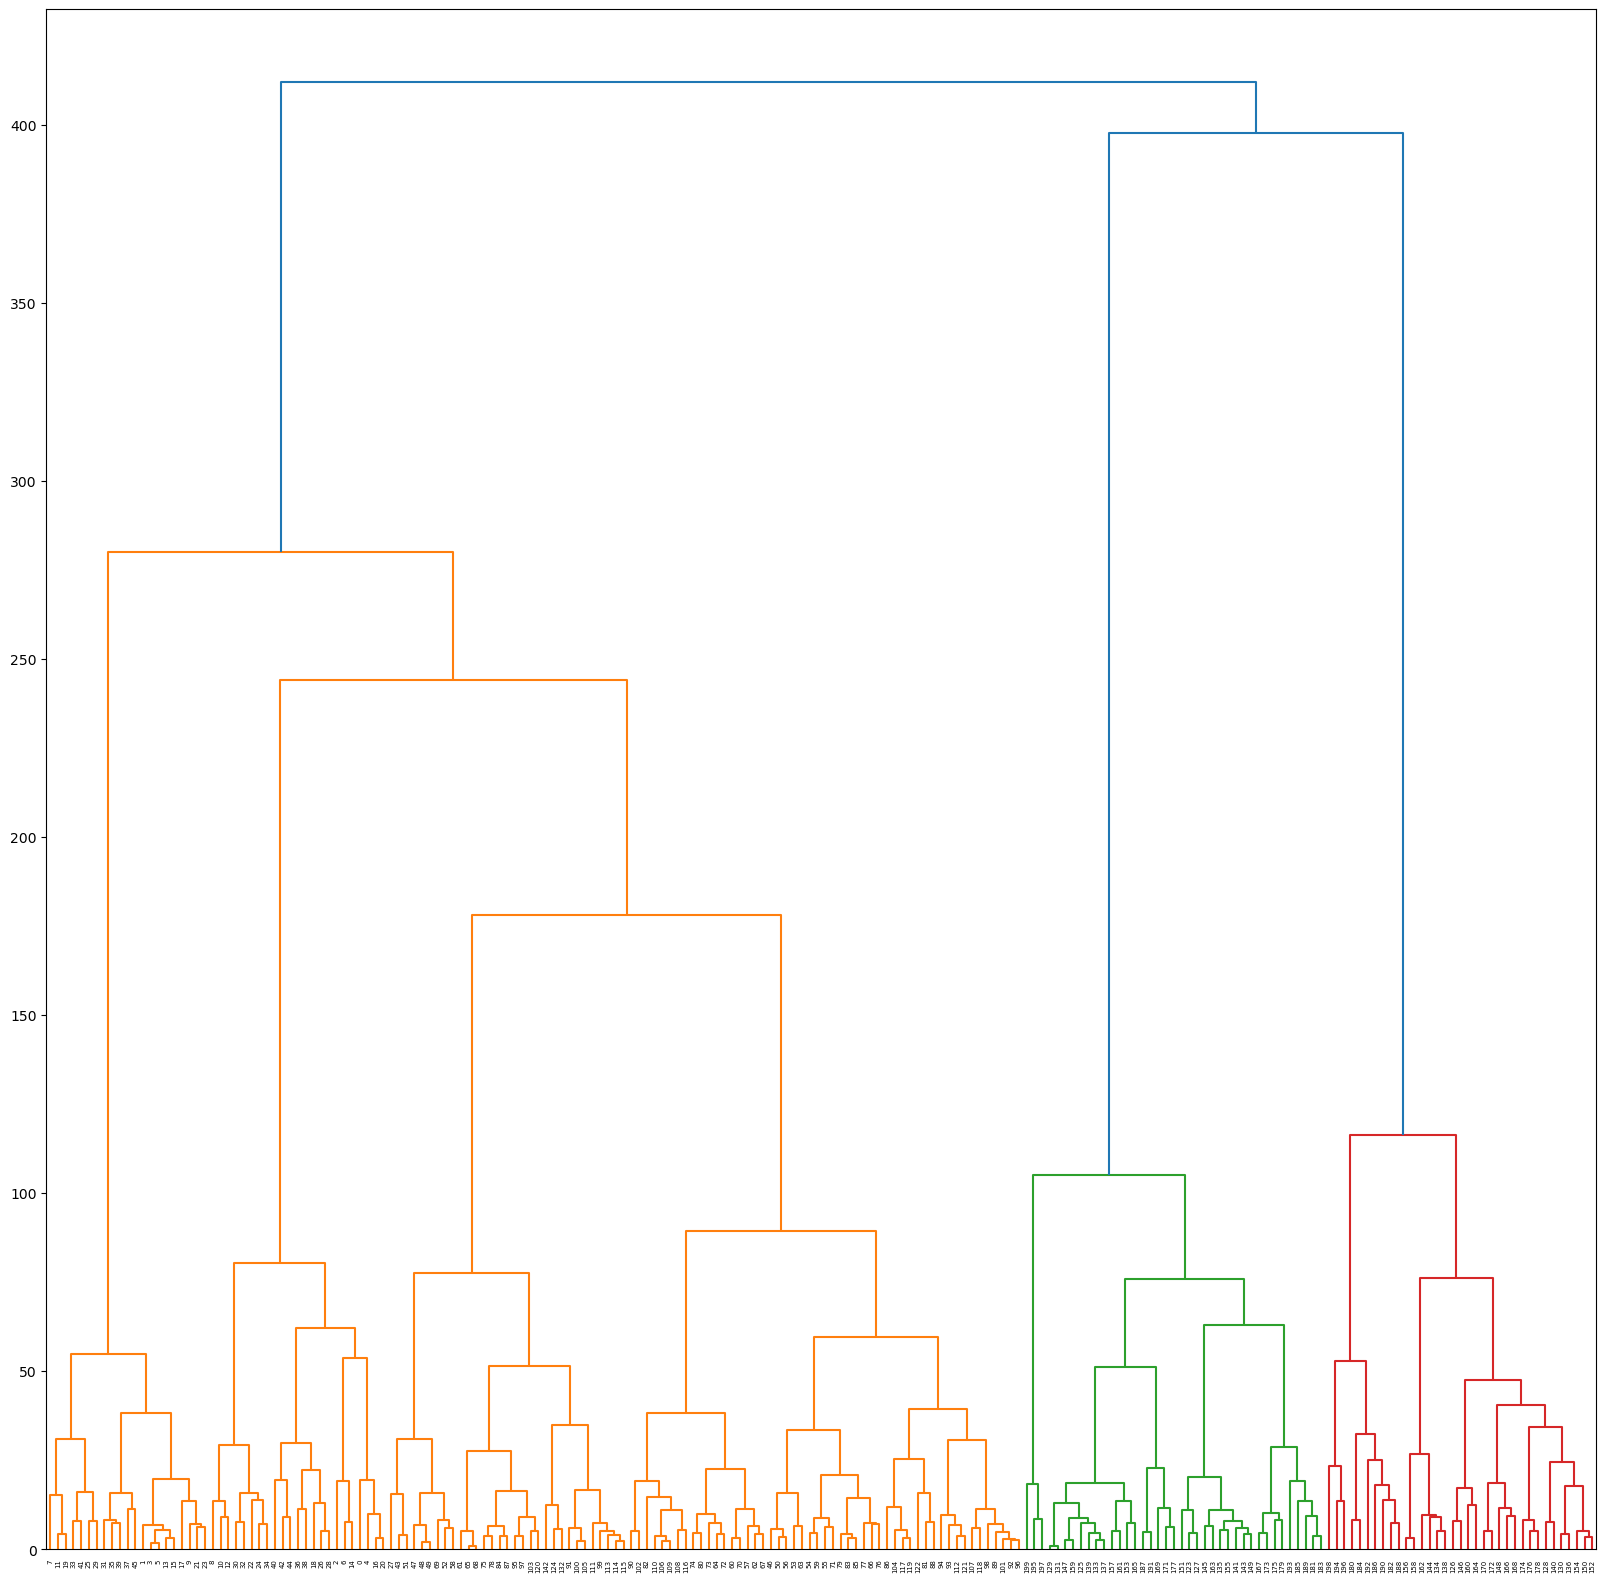

In [56]:
plt.figure(figsize=(20, 20))
dendrogram(var, leaf_rotation=90)